In [1]:
library(Seurat)
library(SeuratObject)
library(dplyr)
library(ggplot2)


file_name <- paste0("AdultFetal_InN")
seu <- readRDS(file = paste0("./load_files/", file_name, ".slim.rds"))

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'SeuratObject':
  method                     from  
  $.JackStrawData            Seurat
  $.Seurat                   Seurat
  $.SeuratCommand            Seurat
  $<-.Seurat                 Seurat
  [.Assay                    Seurat
  [.DimReduc                 Seurat
  [.Seurat                   Seurat
  [.SeuratCommand            Seurat
  [[.Assay                   Seurat
  [[.DimReduc                Seurat
  [[.Seurat                  Seurat
  levels<-.Seurat            Seurat
  .DollarNames.JackStrawData Seurat
  .DollarNames.Seurat        Seurat
  .DollarNames.SeuratCommand Seurat
  as.list.SeuratCommand      Seurat
  as.logical.JackStrawData   Seurat
  dim.Assay                  Seurat
  dim.DimReduc               Seurat
  dim.Seurat                 Seurat
  dimnames.Assay             Seurat
  dimnames.DimReduc          Seurat
  dimnames.

In [2]:
## Update cluster names
seu$subtype2 <- ifelse(is.na(seu$subtype), "unknown", seu$subtype)
seu$mres2 <- ifelse(is.na(seu$mres), "unknown", seu$mres)
seu$mres2[seu$mres2 %in% c("TH")] <- "SST"
tb <- read.table("./load_files/inn.merge.ident.txt", sep="\t", 
                 stringsAsFactors=FALSE, header=TRUE, comment.char = "")
cls_cols <- setNames(tb$color, tb$cluster)

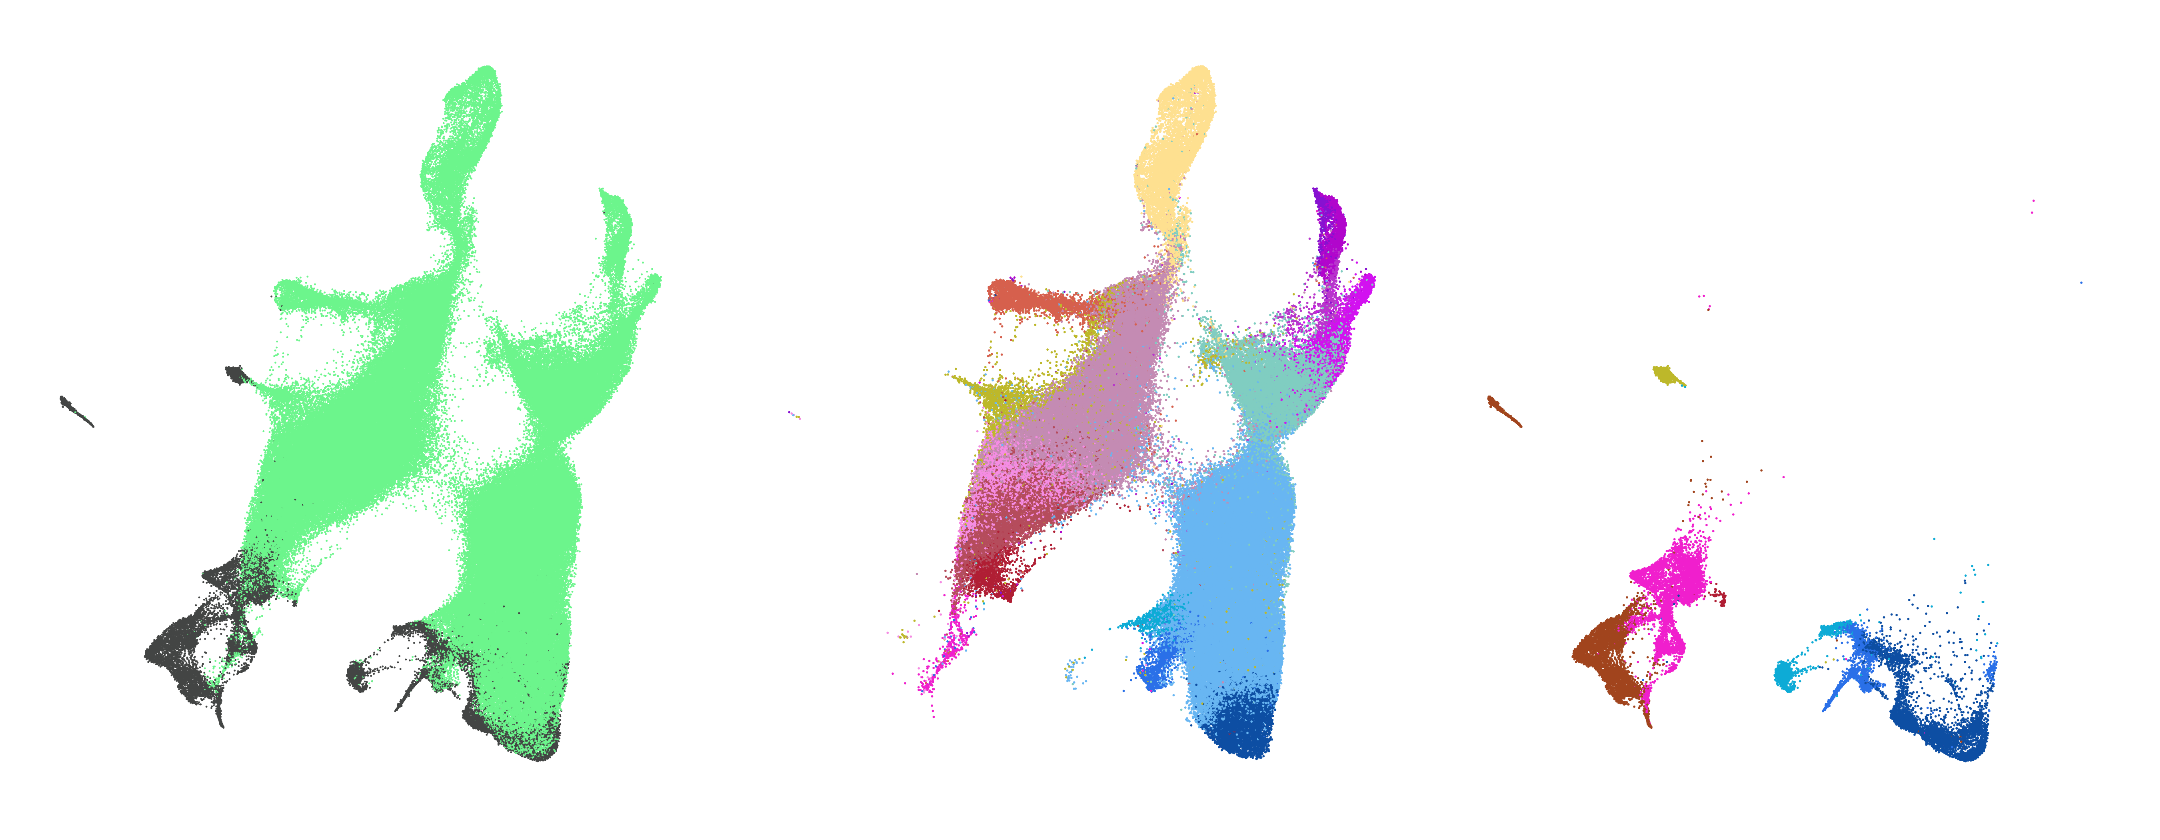

In [3]:
## color schemes
mres_cols <- c("#0d4ea3", "#2a70e8", "#0dabd6", "#a1441d", "#a1441d", "#bdb82a", "#f01fcd", "#b01e34", 
               "#e0e0e0") %>%
            setNames(., c("VIP", "ADARB2", "LAMP5_RELN", "PVALB", "PVALB_CHC", "LAMP5_LHX6", "SST", "SST_NPY", 
                          "unknown"))
dataset_cols <- c("#6cf58c", "#434544") %>% setNames(., c("This study", "Ma et al., 2022"))
col_list <- list(subtype2 = cls_cols, 
            mres2 = mres_cols,
            dataset = dataset_cols) 



## Visualization
pdata <- cbind(seu@meta.data[, c("mres2", "subtype2", "age")], seu$umap@cell.embeddings) %>%
            mutate(dataset = ifelse(!is.na(age), "This study", "Ma et al., 2022"))
set.seed(42)
pdata <- pdata[sample(1:nrow(pdata)), ]


plist <- lapply(c("dataset", "subtype2", "mres2"), function(tp) {
    if (tp %in% c("subtype2", "mres2")){
        subdata <- pdata[pdata[, tp] != "unknown", ]
    } else {
        subdata <- pdata
    }
    tp_size <- ifelse(tp %in% c("subtype2", "mres2"), 0.2, 0.1)
    p <- ggplot(subdata, aes_string(x = "UMAP_1", y = "UMAP_2", color = tp)) +
                ggrastr::rasterise(geom_point(size = tp_size, shape = 16), dpi = 300, scale = 1) +
                theme_classic() + 
                scale_color_manual(values = col_list[[tp]]) + 
                xlim(floor(min(pdata$UMAP_1)),ceiling(max(pdata$UMAP_1)))  + 
                ylim(floor(min(pdata$UMAP_2)),ceiling(max(pdata$UMAP_2))) + 
                theme(legend.position = "none",
                        line = element_blank(),axis.title.x = element_blank(),axis.title.y = element_blank(),
                        axis.text.x=element_blank(),axis.text.y=element_blank(), 
                        plot.title = element_blank())
    return(p)
    })
pcbn <- patchwork::wrap_plots(plotlist = plist, nrow = 1, ncol = 3)
options(repr.plot.width=18, repr.plot.height=7)
pcbn

In [4]:
pdf(paste0("./report/", "AdultFetal_InN_idents.pdf"), width = 24, height = 8)
print(pcbn)
dev.off()

png 
  2

In [5]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS:   /gpfs/ycga/home/sm2726/packages/R_versions/R-3.6.1/lib64/R/lib/libRblas.so
LAPACK: /gpfs/ycga/home/sm2726/packages/R_versions/R-3.6.1/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.3.0      dplyr_1.0.7        SeuratObject_4.0.0 Seurat_3.1.5      

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [